#Import the necessary python libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("/home/sreejithrnair/Downloads/Zomato-data-.csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [20]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


#shape attribute that returns the dimensions of a DataFrame 

In [22]:
df.shape

(148, 7)

#convert the data type of the “rate” column to float and remove the denominator.

In [26]:
def handleRate(value):
    value = str(value).split("/")
    value = value[0]
    return float(value)
df['rate']=df['rate'].apply(handleRate)
df
    

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


#To check if there is any null value in the dataframe

In [28]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

#Finding duplicates entries

In [32]:
df.duplicated().sum()

0

#Summary of the dataframe

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


#Count of Restaurants by Type (Bar Chart) Shows which restaurant category is most common.

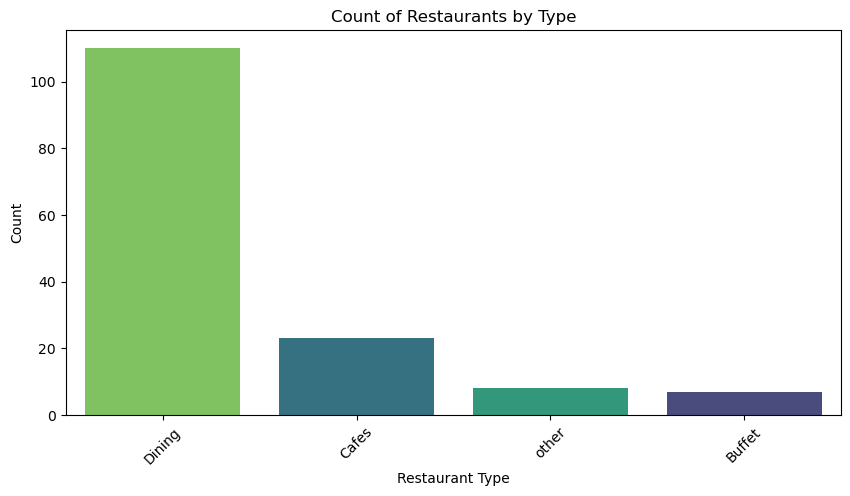

In [48]:
plt.figure(figsize=(10, 5))
sns.countplot(x="listed_in(type)", data=df, order=df["listed_in(type)"].value_counts().index, hue="listed_in(type)", palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.title("Count of Restaurants by Type")
plt.xlabel("Restaurant Type")
plt.ylabel("Count")
plt.show()

#Distribution of Approximate Cost for Two People (Histogram) Shows the range of restaurant pricing.

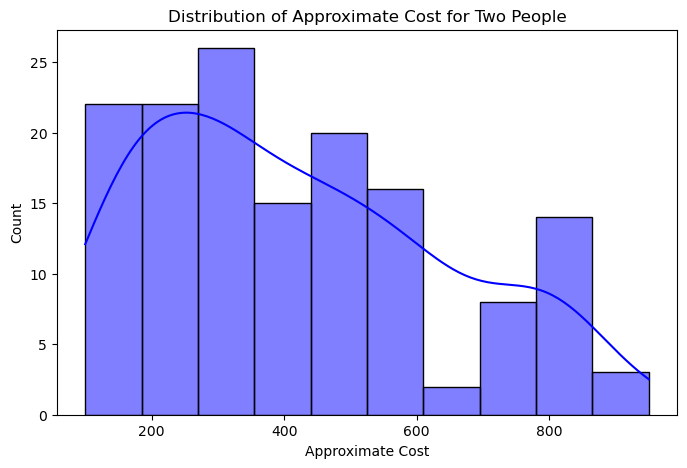

In [52]:
plt.figure(figsize=(8, 5))
sns.histplot(df["approx_cost(for two people)"], bins=10, kde=True, color="blue")
plt.title("Distribution of Approximate Cost for Two People")
plt.xlabel("Approximate Cost")
plt.ylabel("Count")
plt.show()


#Average Rating by Restaurant Type (Bar Chart) See which type has the best ratings on average.

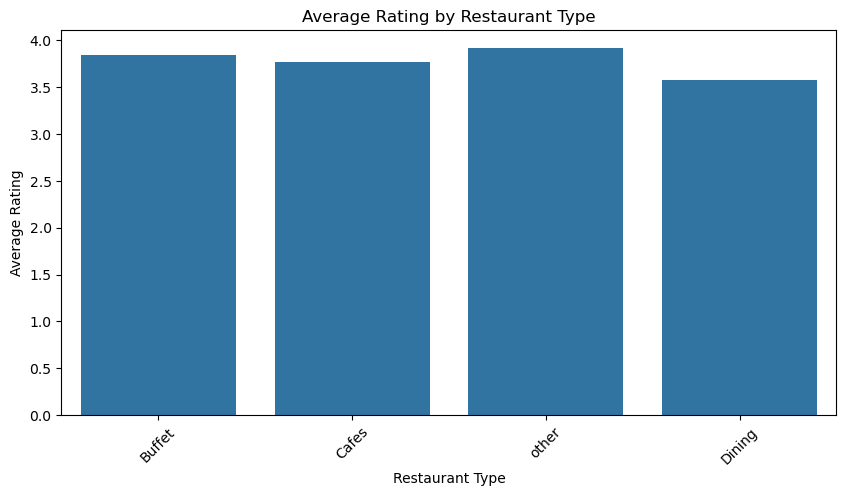

In [58]:
plt.figure(figsize=(10, 5))
sns.barplot(x="listed_in(type)", y=df["rate"].astype(float), data=df, errorbar=None)
plt.xticks(rotation=45)
plt.title("Average Rating by Restaurant Type")
plt.xlabel("Restaurant Type")
plt.ylabel("Average Rating")
plt.show()


#Rating Distribution (Box Plot) Compare ratings across restaurant types with outliers.

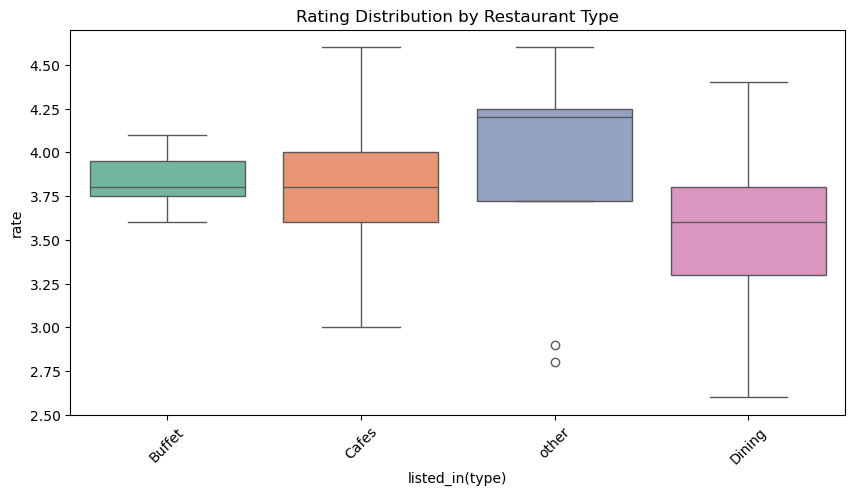

In [64]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="listed_in(type)", y=df["rate"].astype(float),data=df, hue="listed_in(type)", palette="Set2", legend=False)
plt.xticks(rotation=45)
plt.title("Rating Distribution by Restaurant Type")
plt.show()


In [84]:
df.rename(columns={"approx_cost(for two people)": "cost"}, inplace=True)
df["cost"]


0      800
1      800
2      800
3      300
4      600
      ... 
143    100
144    150
145    450
146    800
147    200
Name: cost, Length: 148, dtype: int64

#Relationship Between Cost & Rating (Scatter Plot) Check if expensive restaurants have better ratings.

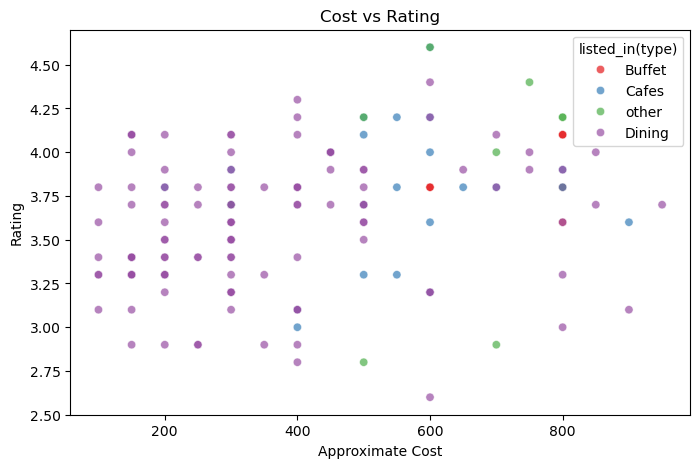

In [86]:
df["cost"] = df["cost"].astype(str).str.replace(",", "").astype(float)
plt.figure(figsize=(8, 5))
sns.scatterplot(x="cost", y=df["rate"].astype(float), data=df, hue="listed_in(type)", palette="Set1", alpha=0.7)
plt.title("Cost vs Rating")
plt.xlabel("Approximate Cost")
plt.ylabel("Rating")
plt.show()


#Votes vs. Rating (Scatter Plot)  Check if higher-rated restaurants receive more votes.

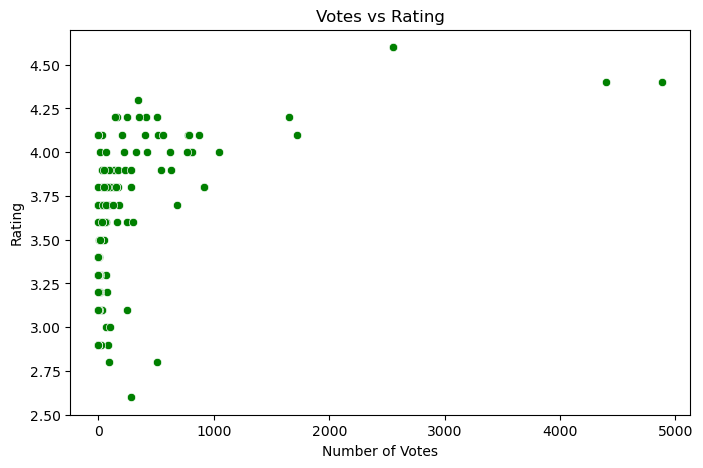

In [110]:
df["votes"] = pd.to_numeric(df["votes"], errors="coerce")  # Converts non-numeric values to NaN
#print(df["votes"].dtype) 
#print(df["votes"].unique())
plt.figure(figsize=(8, 5))
sns.scatterplot(x="votes", y=df["rate"].astype(float), data=df, color="green")
plt.title("Votes vs Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Rating")
plt.show()


#Do restaurants offering online orders have higher ratings?

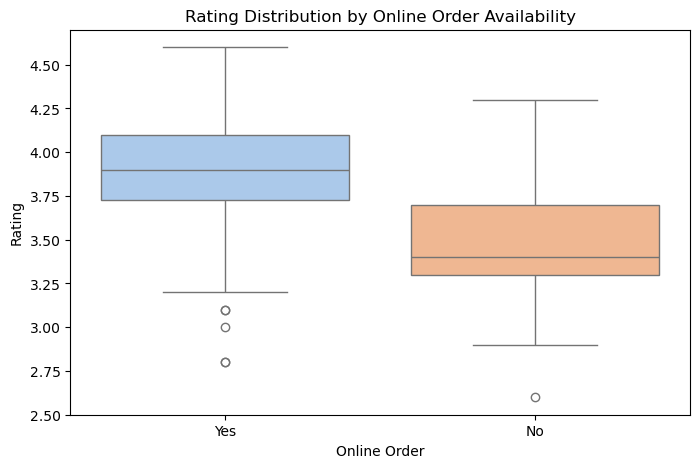

In [116]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="online_order", 
    y=df["rate"].astype(float), 
    hue="online_order",  # Assign x variable to hue
    data=df, 
    palette="pastel",
    legend=False  # Prevents duplicate legends
)
plt.title("Rating Distribution by Online Order Availability")
plt.xlabel("Online Order")
plt.ylabel("Rating")
plt.show()


#Check if table booking availability affects ratings.

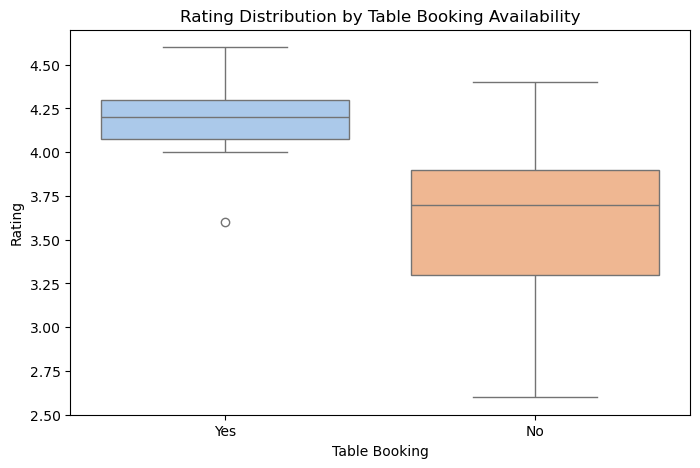

In [120]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="book_table", 
    y=df["rate"].astype(float), 
    hue="book_table", 
    data=df, 
    palette="pastel",
    legend=False  
)
plt.title("Rating Distribution by Table Booking Availability")
plt.xlabel("Table Booking")
plt.ylabel("Rating")
plt.show()


#Find relationships between numerical variables.

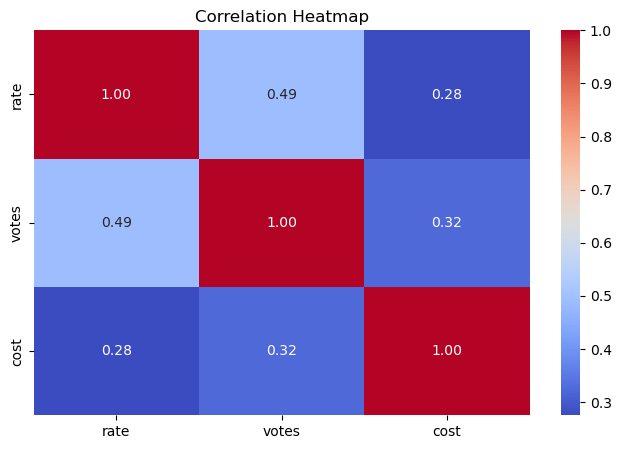

In [124]:

plt.figure(figsize=(8, 5))
sns.heatmap(df[["rate", "votes", "cost"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
